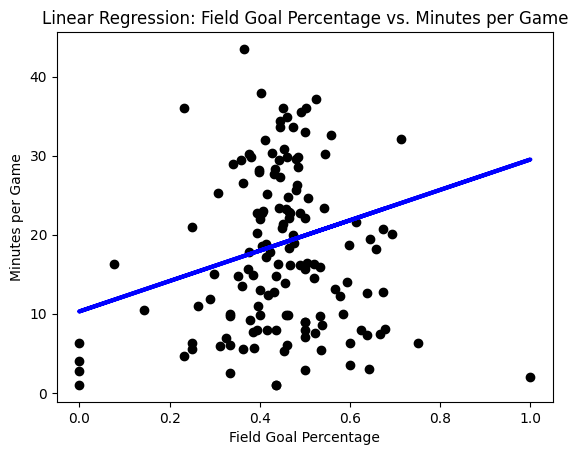

In [11]:
#Task 1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer

url = "https://www.stat.cmu.edu/cmsac/sure/2022/materials/data/sports/intro_r/nba_2022_player_stats.csv"
df = pd.read_csv(url)

df['field_goal_percentage'] = df['field_goals'] / df['field_goal_attempts']

df['minutes_per_game'] = df['minutes_played'] / df['games']

X = df['field_goal_percentage'].values.reshape(-1, 1)
y = df['minutes_per_game'].values

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Field Goal Percentage')
plt.ylabel('Minutes per Game')
plt.title('Linear Regression: Field Goal Percentage vs. Minutes per Game')
plt.show()



In [12]:
#Task 2
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)

model_sm = sm.OLS(y_train, X_train_const).fit()

print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     46.86
Date:                Thu, 16 Nov 2023   Prob (F-statistic):           1.98e-11
Time:                        15:36:15   Log-Likelihood:                -2094.2
No. Observations:                 572   AIC:                             4192.
Df Residuals:                     570   BIC:                             4201.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2984      1.276      8.068      0.0

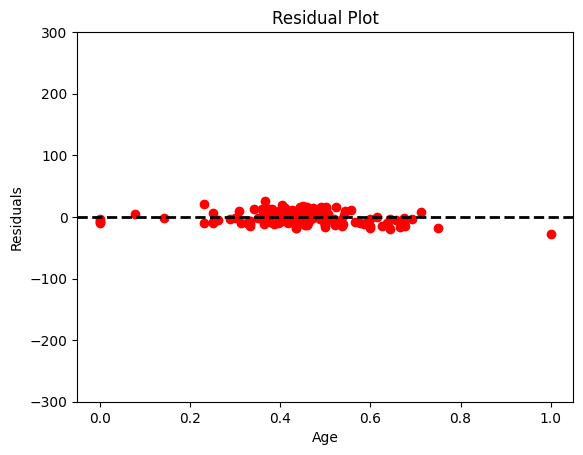

In [13]:
#Task 3
residuals = y_test - y_pred

plt.scatter(X_test, residuals, color='red')
plt.axhline(y=0, color='black', linestyle='--', linewidth=2)
plt.xlabel('Age')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.ylim(-300, 300) 
plt.show()

Task 4: Residual Plot Analysis

Examining the residuals vs. fitted values plot visually for patterns is the first step in the analysis of residual plots. Patterns could point to assumptions being broken.Residual plot interpretation can be arbitrary and may call for domain expertise.

In the plot of Residuals versus Fitted Values:
A distinct pattern or curvature may indicate non-linearity.
A shift in the residuals' spread with the fitted values may indicate heteroscedasticity.

Within the Plot of Quantiles:
Points that stray from the straight line may indicate that the residuals are not normally distributed.